In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [58]:
df = pd.read_csv("btcprice.csv")
df_sentiment = pd.read_csv("cryptonews_sentiment.csv")

In [123]:
df.loc[:, "Close"].tolist()

[56041.05859375,
 57401.09765625,
 57321.5234375,
 61593.94921875,
 60892.1796875,
 61553.6171875,
 62026.078125,
 64261.9921875,
 65992.8359375,
 62210.171875,
 60692.265625,
 61393.6171875,
 60930.8359375,
 63039.82421875,
 60363.79296875,
 58482.38671875,
 60622.13671875,
 62227.96484375,
 61888.83203125,
 61318.95703125,
 61004.40625,
 63226.40234375,
 62970.046875,
 61452.23046875,
 61125.67578125,
 61527.48046875,
 63326.98828125,
 67566.828125,
 66971.828125,
 64995.23046875,
 64949.9609375,
 64155.94140625,
 64469.52734375,
 65466.83984375,
 63557.87109375,
 60161.24609375,
 60368.01171875,
 56942.13671875,
 58119.578125,
 59697.1953125,
 58730.4765625,
 56289.2890625,
 57569.07421875,
 56280.42578125,
 57274.6796875,
 53569.765625,
 54815.078125,
 57248.45703125,
 57806.56640625,
 57005.42578125,
 57229.828125,
 56477.81640625,
 53598.24609375,
 49200.703125,
 49368.84765625,
 50582.625,
 50700.0859375,
 50504.796875,
 47672.12109375,
 47243.3046875,
 49362.5078125,
 50098.335

In [59]:
new_date = []

df_sentiment["date"]
for i in range(len(df_sentiment)):
     x = df_sentiment.loc[i, "date"]
     new_date.append(str(str(x).split(" ")[0]))


In [ ]:
df_sentiment["date"] = new_date
df_sentiment

# Calculate the mean polarity for each date
daily_mean_polarity = df_sentiment.groupby('date')['polarity'].mean()

# Sort the results by date
daily_mean_polarity = daily_mean_polarity.sort_index()

# Display the result
print("Mean polarity for all dates:")
print(daily_mean_polarity)

# Optional: If you want to see summary statistics of the daily mean polarity
print("\nSummary statistics of daily mean polarity:")
print(daily_mean_polarity.describe())




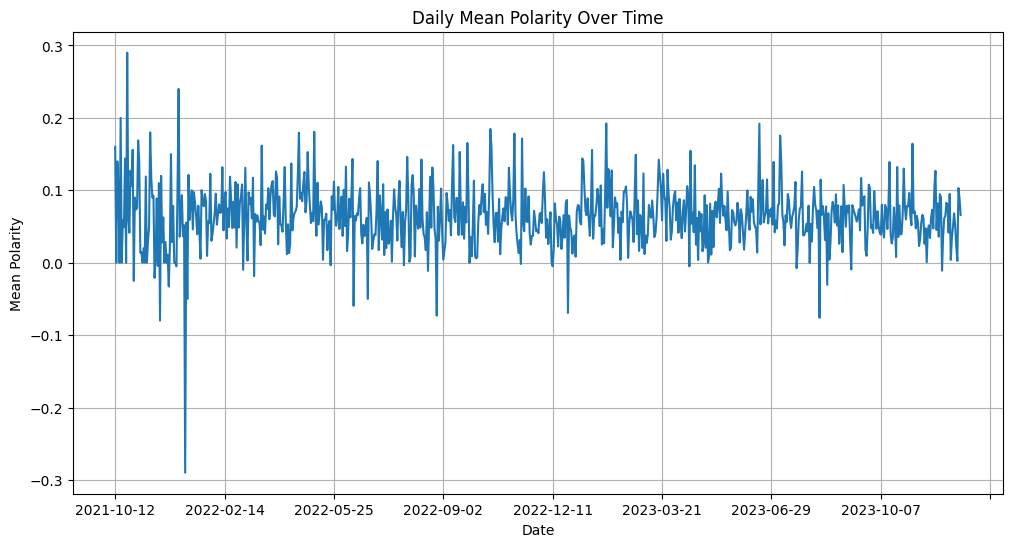

In [71]:
# Optional: If you want to plot the daily mean polarity over time
plt.figure(figsize=(12, 6))
daily_mean_polarity.plot()
plt.title('Daily Mean Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Polarity')
plt.grid(True)
plt.show()




In [26]:
df.loc[((df["Date"] >= "2021-10-16") & (df["Date"] > "2022-12-14")), "Close"]

429    17364.865234
430    16647.484375
431    16795.091797
432    16757.976562
433    16439.679688
           ...     
793    43023.972656
794    41929.757812
795    42240.117188
796    41364.664062
797    42623.539062
Name: Close, Length: 369, dtype: float64

In [ ]:
# df.loc[((df["Date"] >= date_start) & (df["Date"] < end_date)), "Close"].tolist()

In [62]:
start_date = df.index[df["Date"] == "2023-01-01"].tolist()
end_date = df.index[df["Date"] == "2023-02-01"].tolist()


# Sentiment
start_sent_date = df_sentiment.index[df_sentiment["date"] == "2023-01-01"].tolist()
end_sent_date = df_sentiment.index[df_sentiment["date"] == "2023-02-01"].tolist()

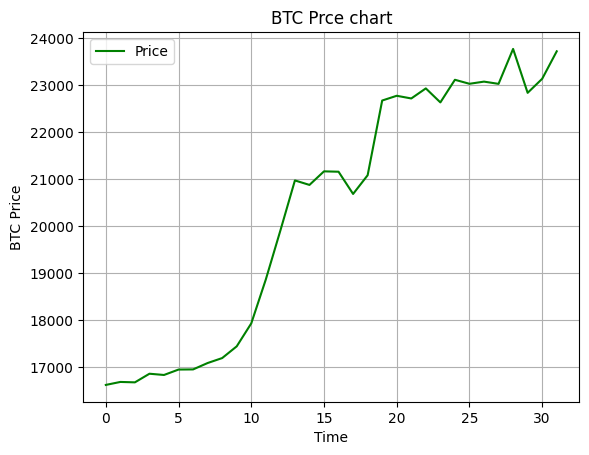

In [38]:
# Plot prices
plt.plot(df.loc[start_date[0]:end_date[0], "Close"].tolist(), color='green', label=f'Price')
plt.title(f'BTC Prce chart')
plt.xlabel('Time')
plt.ylabel(f'BTC Price')
plt.legend(loc='upper left')
plt.grid()
plt.show()

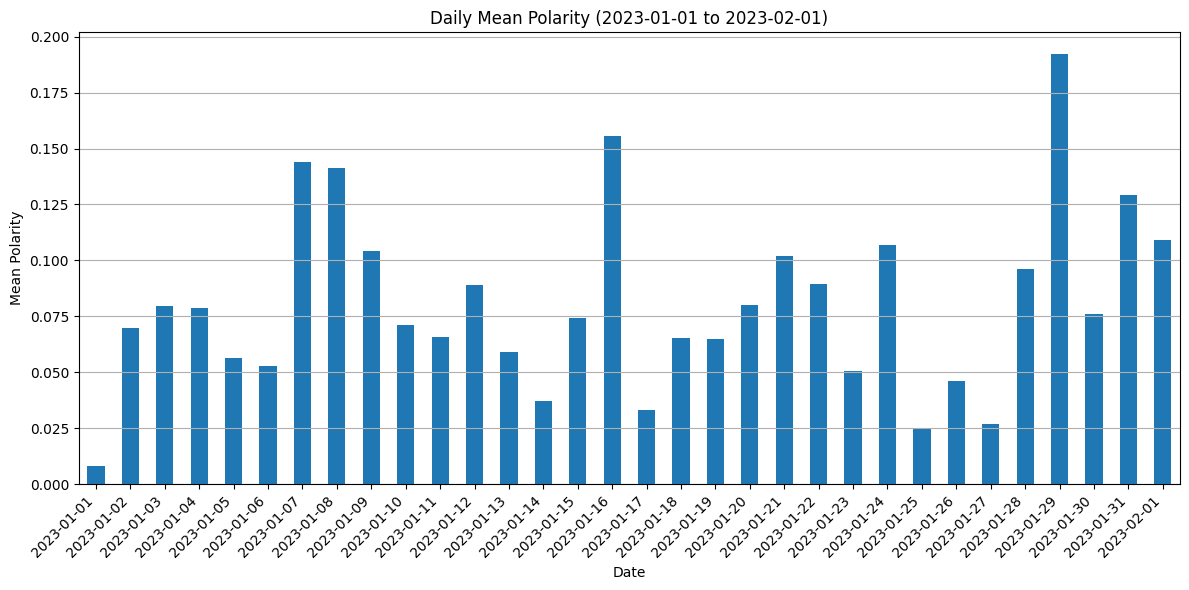

In [94]:
# Plot bar chart for a specific date range
start_date = "2023-01-01"
end_date = "2023-02-01"

# Filter the daily_mean_polarity for the specified date range
date_range_polarity = daily_mean_polarity.loc[start_date:end_date]

plt.figure(figsize=(12, 6))
date_range_polarity.plot(kind='bar')
plt.title(f'Daily Mean Polarity ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Mean Polarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [134]:
# Create a new DataFrame with unique dates and daily mean polarity
new_df = pd.DataFrame({
    'date': daily_mean_polarity.index,
    'polarity': daily_mean_polarity.values
})

# Display the first few rows of the new DataFrame
new_df.to_csv("cryptonews_sentiment_unique_dates.csv")

In [148]:
dates = []
price_at_date = []
polarity_at_date = []


for date in new_df['date']:
    # Convert date to string format matching df['Date']    
    # Find the corresponding Close price in df
    price = df.loc[df['Date'] == date, 'Close']
    polarity = new_df.loc[new_df['date'] == date, 'polarity']
    
    if not price.empty:
        dates.append(date)
        price_at_date.append(price.iloc[0])
        polarity_at_date.append(polarity.iloc[0])


# Now price_at_date contains the Close prices corresponding to dates in new_df

In [149]:
len(dates)

758

In [150]:
new_df = pd.DataFrame({
    'date': dates,
    'prices': price_at_date,
    'polarity': polarity_at_date
})
new_df.to_csv("cryptonews_sentiment_unique_dates.csv")

Analysis of our sentiment added to the 2019-2024 data


In [54]:
df_prices = pd.read_csv("./dataset/btcprice2019-2024.csv")
df_sentiment = pd.read_csv("./dataset/BERT_sentiment.csv")

In [96]:
dates = []
price_at_date = []
polarity_at_date = []


for date in df_sentiment['Date']:
    # Convert date to string format matching df['Date']    
    # Find the corresponding Close price in df
    price = df_prices.loc[df_prices['Date'] == date, 'Close']
    polarity = df_sentiment.loc[df_sentiment['Date'] == date, 'FinBERT score']
    
    if not price.empty:
        dates.append(date)
        price_at_date.append(price.iloc[0])
        polarity_at_date.append(polarity.iloc[0])

In [98]:
new_df = pd.DataFrame({
    'date': dates,
    'prices': price_at_date,
    'sentiment': polarity_at_date
})
new_df.to_csv("./dataset/BERT_sentiment_withprices.csv")

In [95]:
df_sentiment.shape[0]

2076

In [ ]:
df_sentiment["FinBERT score"].tolist()

In [91]:
start_date = df_sentiment.index[df_sentiment["Date"] == "2019-01-01"].tolist()
end_date = df_sentiment.index[df_sentiment["Date"] == "2019-06-01"].tolist()

In [92]:
# Plot bar chart for a specific date range
start_date_str = "2019-01-01"
end_date_str = "2019-06-01"

df_sentiment_bar = df_sentiment.loc[start_date[0]:end_date[0], "FinBERT score"].tolist()
xticks_bar = df_sentiment.loc[start_date[0]:end_date[0], "Date"].tolist()
df_prices_bar = df_prices.loc[start_date[0]:end_date[0], "Close"].tolist()

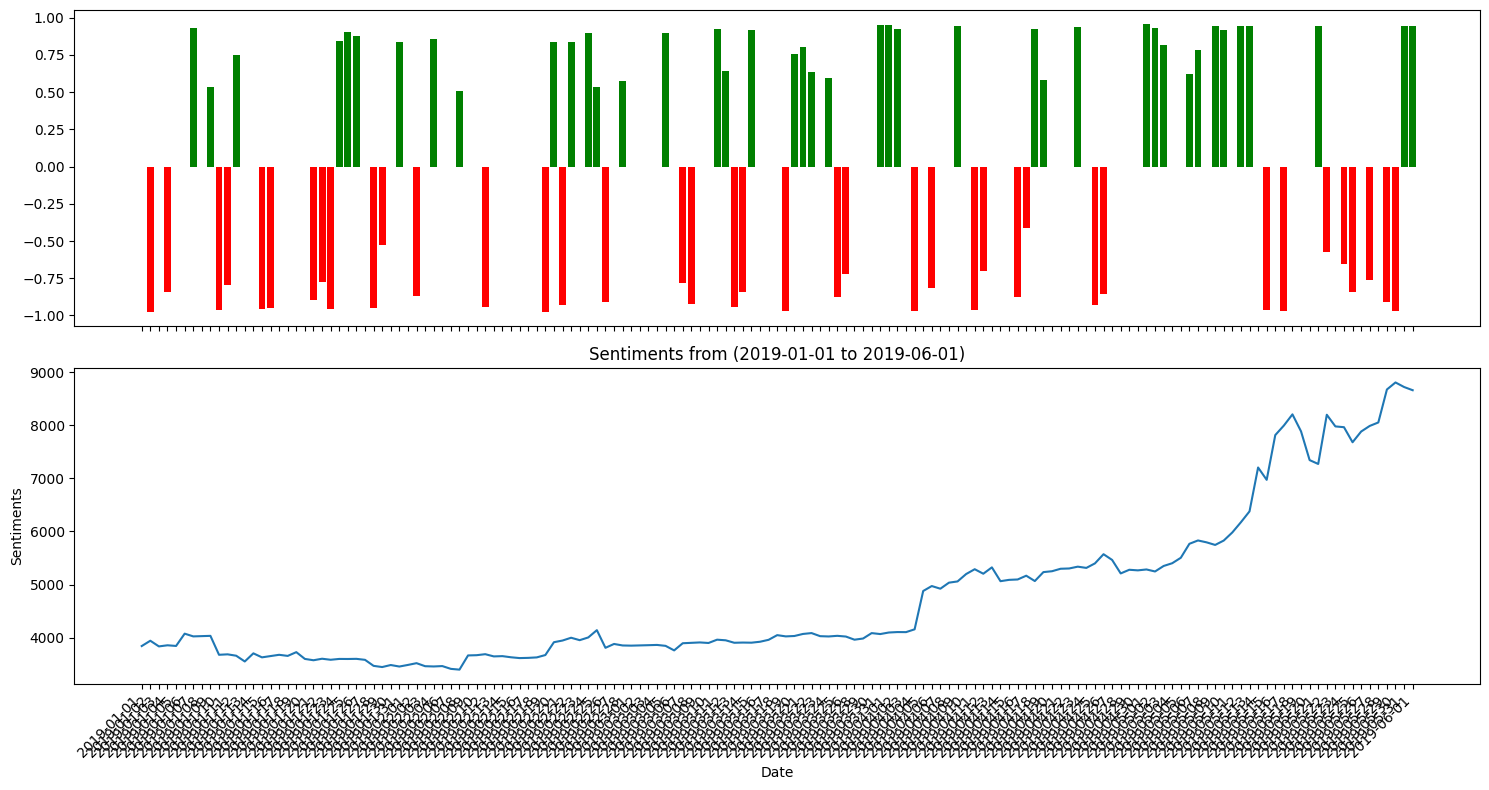

In [93]:
# plt.figure(figsize=(12, 6))

# plt.bar(range(len(df_prices_bar)), df_prices_bar)

fig, ax = plt.subplots(2, sharex=True, figsize=(15, 8))
colors = ['g' if x > 0 else 'r' for x in df_sentiment_bar]
colors_bar = ['g' if df_sentiment_bar.index(x)-1 > 0 and (df_sentiment_bar[df_sentiment_bar.index(x)-1] > df_sentiment_bar[df_sentiment_bar.index(x)]) else 'r' for x in df_sentiment_bar]

ax[0].bar(range(len(df_sentiment_bar)), df_sentiment_bar, color=colors)

ax[1].plot(df_prices_bar)
ax[1].set_xticks(range(len(xticks_bar)))
ax[1].set_xticklabels(xticks_bar, rotation=45, ha='right')

plt.title(f'Sentiments from ({start_date_str} to {end_date_str})')
plt.xlabel('Date')
plt.ylabel('Sentiments')
plt.tight_layout()
plt.show()

In [ ]:
plt.plot()